# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
## importing libraries 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
## reading dataset

data = pd.read_csv(r'marketing.csv')

## setting max columns to none
pd.set_option('display.max_columns', None)


data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
## getting percentage of missing values

(data.isnull().sum()/len(data))*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [4]:
## including imputation for missing entries

## Imputation for column 'Income' - float dataype
data[["Income"]] = data[["Income"]].fillna(0)

(data.isnull().sum()/len(data))*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [5]:
## getting duplicate records in the dataset

data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [6]:
## dropping columns 'ID' and 'Dt_Customer'

data = data.drop(['ID','Dt_Customer'], axis=1)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [7]:
## checking unique categories in the column 'Marital_Status'

data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [8]:
## Replacing 'Married', 'Together' as 'Relationship'; 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'

data['Marital_Status'] = data['Marital_Status'].replace({'Married':'Relationship','Together':'Relationship',
                                                        'Divorced':'Single','Widow':'Single','Alone':'Single','YOLO':'Single','Absurd':'Single'})

data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [9]:
## grouping all the required columns into a variable

data_columns = pd.Series(data.columns)
expense_group = data_columns[data_columns.str.contains('Mnt')].values.tolist()


## computing sum of all grouped columns into a separate column 

data['Total_Expenses'] = data[expense_group].sum(axis=1)
data['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [10]:
## grouping all the required columns into a variable

purchase_group = data_columns[data_columns.str.contains('Purchases')].values.tolist()


## computing sum of all grouped columns into a separate column 

data['Num_Total_Purchases'] = data[purchase_group].sum(axis=1)
data['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [11]:
## grouping columns 'Kidhome' and 'Teenhome' as 'Kids'

data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [12]:
## grouping all the required columns into a variable

accepted_group = data_columns[data_columns.str.contains('Accepted')].values.tolist()


## computing sum of all grouped columns into a separate column 

data['TotalAcceptedCmp'] = data[accepted_group].sum(axis=1) + data['Response']
data['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [13]:
## dropping the previously used columns

data = data.drop(expense_group, axis=1)
data = data.drop(purchase_group, axis=1)
data = data.drop(accepted_group, axis=1)
data = data.drop(['Kidhome', 'Teenhome', 'Response'], axis=1)

data.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,Relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,Relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,Relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [14]:
## Calculating age using 'Year_Birth' :: current-year - birth-year and Dropping the 'Year_Birth' column

import datetime

data['age'] = datetime.datetime.today().year - data['Year_Birth']
data = data.drop('Year_Birth', axis=1)

data.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,39
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,42


### 13. Encode the categorical variables in the dataset

In [15]:
## get all columns with type 'Object'

categorical_columns = data.select_dtypes('object')


## perform label encoding for selected columns

lbl_encoder = LabelEncoder()
for i in categorical_columns:
    data[i] = data[[i]].apply(lbl_encoder.fit_transform)
    
data.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,2,1,58138.0,58,7,0,1617,25,0,1,66
1,2,1,46344.0,38,5,0,27,6,2,0,69
2,2,0,71613.0,26,4,0,776,21,0,0,58
3,2,0,26646.0,26,6,0,53,8,1,0,39
4,4,0,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [16]:
## Standardizing the columns

data_df = data.copy()
scaled_features = StandardScaler().fit_transform(data_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index = data_df.index, columns = data_df.columns)

scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.350141,1.346874,0.251939,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,1.346874,-0.208699,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,-0.742460,0.778231,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,-0.742460,-0.978043,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,-0.742460,0.257992,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [17]:
## step 1: Calculate the covariance matrix

cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663,  0.01375403,  0.11771325, -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [ 0.01375403,  1.00044663, -0.00733686,  0.00450972, -0.00344176,
         0.00520466,  0.01775232, -0.00671037, -0.03917598,  0.06004206,
         0.0042384 ],
       [ 0.11771325, -0.00733686,  1.00044663, -0.01060766, -0.53569091,
        -0.02449955,  0.65444582,  0.55599284, -0.29306798,  0.2845784 ,
         0.15496032],
       [-0.01173369,  0.00450972, -0.01060766,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882, -0.00344176, -0.53569091, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252,  0.00520466, -0.02449955,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [18]:
## step 2: Calculate eigen values and eigen vectors

eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen values: ', eig_values)
print('\n')
print('Eigen vectors: ',eig_vectors)

Eigen values:  [3.17678038 0.15957653 0.3509169  1.2562387  0.57214283 0.70145888
 0.814775   0.88247068 1.07494142 0.99866395 1.01694764]


Eigen vectors:  [[-8.08913337e-02  1.34287922e-02 -2.27212237e-02 -5.54236274e-01
   9.51813937e-02 -1.08341857e-01 -6.91408675e-01 -2.11423549e-01
   3.49567300e-01  1.35359526e-01  3.89785998e-02]
 [-1.62311720e-02 -3.60121146e-04  5.09081939e-03  7.23444227e-02
  -1.24944958e-02 -1.62614604e-01  9.76593368e-02  2.48984480e-01
   2.95109122e-01  5.05863030e-01 -7.43881542e-01]
 [-4.50500542e-01  9.58352697e-02  7.30288996e-01 -1.07170539e-01
  -4.11229260e-01 -2.41505501e-01  3.31338840e-02  8.14884584e-02
  -6.71499700e-02 -4.10046692e-02  4.11604803e-02]
 [ 6.34322824e-03  3.79939344e-02  2.63897298e-02 -1.09427013e-01
  -5.40497224e-02  1.34582050e-01 -2.73798784e-02 -4.73971963e-01
  -6.57673396e-01  5.46500663e-01 -9.06393136e-02]
 [ 3.77964089e-01 -1.07667683e-01  5.23555778e-01 -3.97586639e-02
   4.45474943e-01 -8.76404494e-02  2.93610001

In [19]:
## step 3: Scree plot

total = sum(eig_values)
var_exp = [(i/total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print('Explained Variance: ', var_exp)
print('\n')
print('Cummulative Variance Explained: ', cum_var_exp)

Explained Variance:  [28.866928817078996, 11.415253415176117, 9.767832156879745, 9.240851320556228, 9.074710198868914, 8.018879299474854, 7.4037387414600575, 6.374052120386398, 5.1989764034588415, 3.188729465981809, 1.4500480606780255]


Cummulative Variance Explained:  [ 28.86692882  40.28218223  50.05001439  59.29086571  68.36557591
  76.38445521  83.78819395  90.16224607  95.36122247  98.54995194
 100.        ]


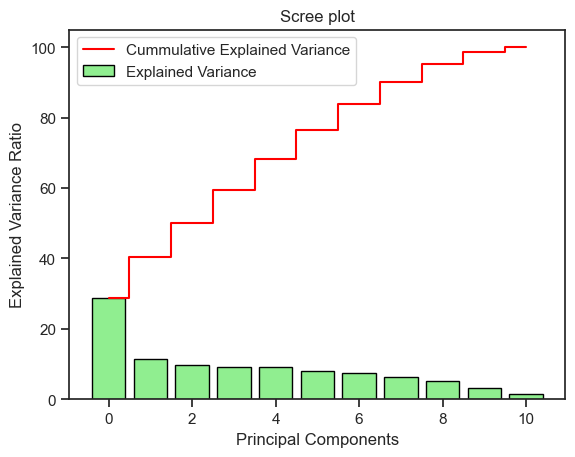

In [20]:
## Scree plot

plt.bar(range(11), var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(11), cum_var_exp, where='mid', color='red', label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

- It is observed from the above Scree plot, that first 8 principal components are explaining about 90-95% of the variation.
- Hence, the optimal number of principal componets is chosen as 8

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [21]:
## Using dimensions obtained from PCA to apply clustering (i.e., 8)

pca = PCA(n_components = 8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.968519,-0.068085,-0.334469,1.205780,-0.687483,-0.292572,-1.151264,-0.339571
1,-1.506380,0.995503,-0.369068,1.012456,-0.416880,1.371874,-0.726737,-0.335913
2,1.318022,-0.296890,0.296975,-0.777798,0.722521,0.984771,0.021199,0.064181
3,-1.730941,-1.136707,-0.259541,-0.834579,0.572279,0.220158,0.563199,0.236836
4,0.068028,0.567827,0.904110,-0.748457,-0.811727,-1.231499,1.328402,0.905113


In [22]:
## Finding optimal K value by KMeans clustering using Elbow plot

cluster_errors = []
cluster_range = range(2,15)

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)


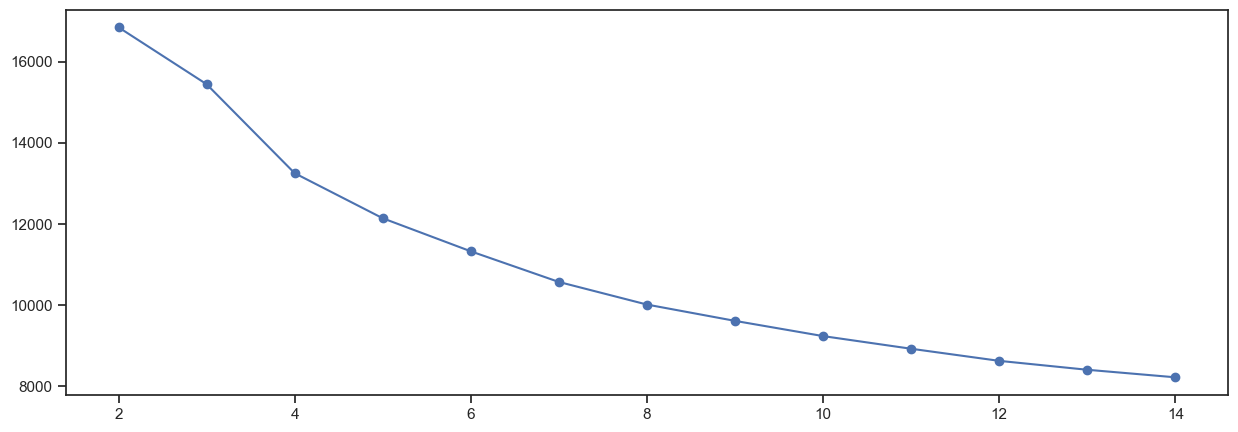

In [23]:
## creatinf a dataframe of number of clusters and cluster errors

cluster_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})


## Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_cluster'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()

- From the above Elbow plot, it is observed that at cluster K=3, the inertia descreases significantly
- Hence we are selecting the optimal cluster value as K=3

In [24]:
## Applying KMeans clustering for optimal number of cluster obtained (K=3)

kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [25]:
## creating a dataframe of labels

label = pd.DataFrame(kmeans.labels_, columns=['Label'])


## joining the label dataframe to the pca_df dataframe

kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.968519,-0.068085,-0.334469,1.205780,-0.687483,-0.292572,-1.151264,-0.339571,2
1,-1.506380,0.995503,-0.369068,1.012456,-0.416880,1.371874,-0.726737,-0.335913,1
2,1.318022,-0.296890,0.296975,-0.777798,0.722521,0.984771,0.021199,0.064181,2
3,-1.730941,-1.136707,-0.259541,-0.834579,0.572279,0.220158,0.563199,0.236836,1
4,0.068028,0.567827,0.904110,-0.748457,-0.811727,-1.231499,1.328402,0.905113,0


In [26]:
kmeans_df['Label'].value_counts()

1    1025
0     700
2     515
Name: Label, dtype: int64

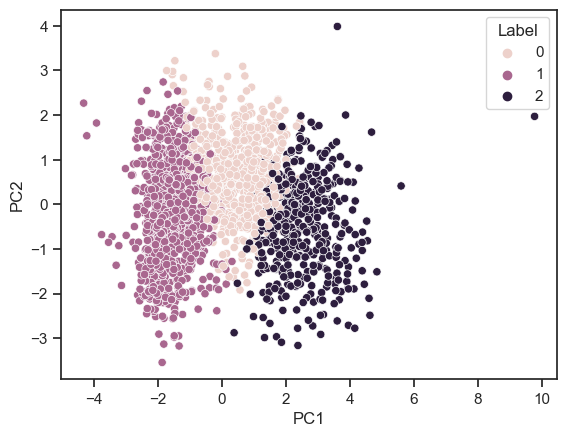

In [27]:
## visalizing the clusters formed 

sns.scatterplot(kmeans_df['PC1'], kmeans_df['PC2'], hue='Label', data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

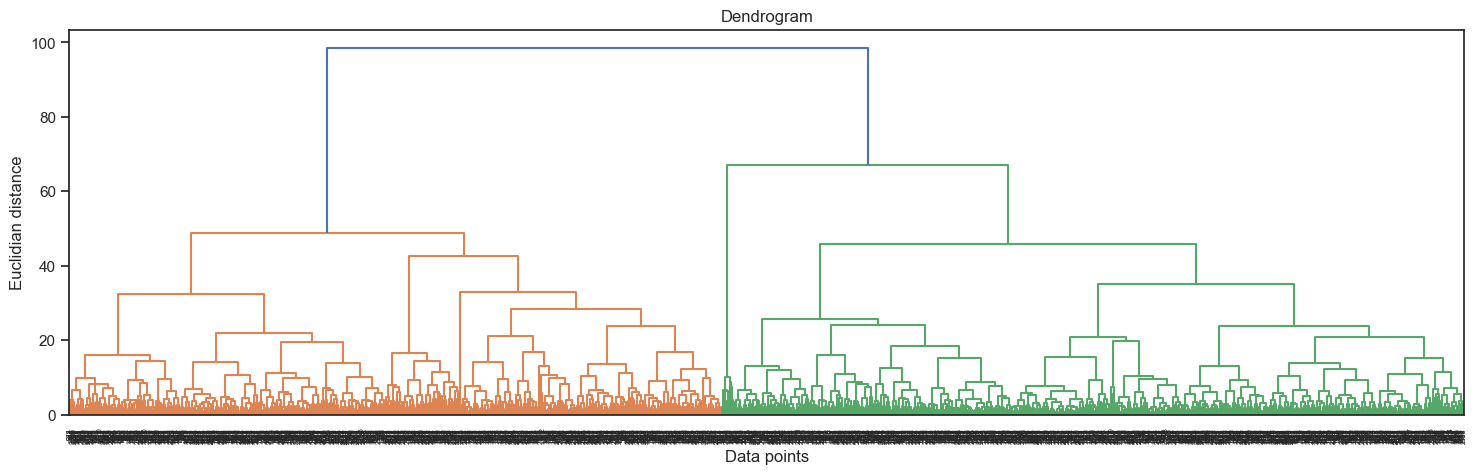

In [28]:
## Agglomerative clustering using original data

plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.xlabel('Data points')
plt.ylabel('Euclidian distance')
plt.title('Dendrogram')
plt.show()

In [29]:
## Computing Silhoutte score from Agglomerative clustering

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i, silhouette_score(scaled_features_df, labels))

2 0.1974337356644134
3 0.20764836363255246
4 0.13544466713355788
5 0.11316240667286286
6 0.12148382880102437
7 0.10037424540355985
8 0.10132407206971501
9 0.09929236942798547
10 0.10409063087394792
11 0.10475335930944836
12 0.10960098835526288
13 0.10174126642778794
14 0.102212522730052


 - We have obtained the Silhoutte scores for varios clusters. Further, it is observed from the above Silhoutte score, that the score is highest for cluster 3.
 - So we choose K=3 as the optimal cluster size and build an Agglomerative clustering model using the original scaled datasheet

In [30]:
## Building hierarchial clustering model using the optimal clusters using the original datasheet (K=3)

hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [31]:
## Creating a dataframe of the labels

df_label = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label.head()

,Labels
0,0
1,1
2,0
3,1
4,1


In [32]:
## Joining the label dataframes with unscaled initial cleaned dataframe (dfc)

df_hier = data_df.join(df_label)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Labels
0,2,1,58138.0,58,7,0,1617,25,0,1,66,0
1,2,1,46344.0,38,5,0,27,6,2,0,69,1
2,2,0,71613.0,26,4,0,776,21,0,0,58,0
3,2,0,26646.0,26,6,0,53,8,1,0,39,1
4,4,0,58293.0,94,5,0,422,19,1,0,42,1


### Visualization and Interpretation of results

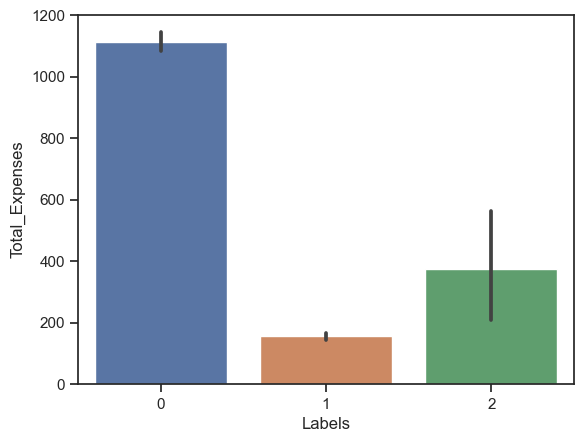

In [33]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

- Total Expense is much higher for Cluster-0 compared to Cluster-1 and Cluster-2

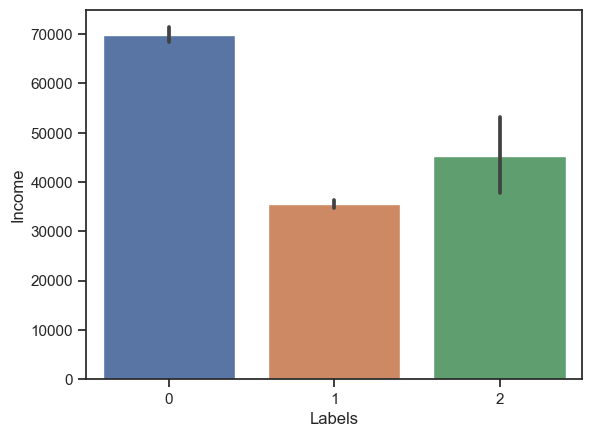

In [34]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

- It is observed that Cluster-0 receives maximum income when compared to other Clusters (cluster-1 and cluster-2)

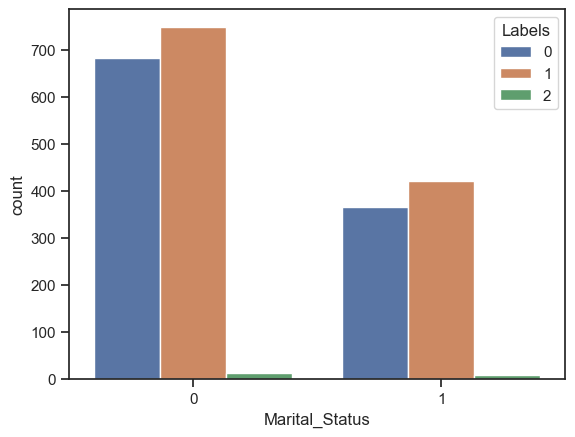

In [35]:
sns.countplot(df_hier['Marital_Status'], hue='Labels', data=df_hier)
plt.show()

- It is observed that maximum number of people in all clusters are 'Single' with comparative lesser number of people in 'Relationship'
- Population in Cluster-1 is maximum and Cluster-0 has comparatively lesser population while Cluster-2 has very low population

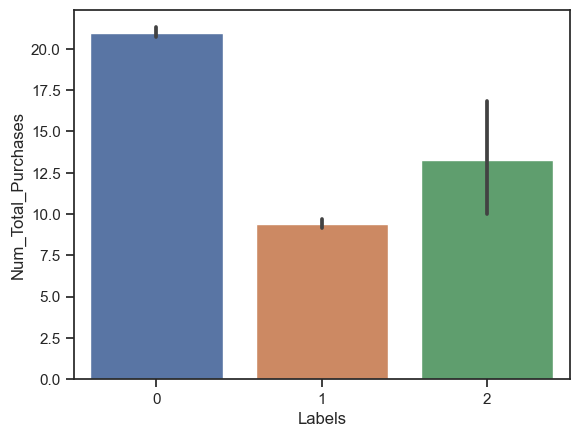

In [36]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

- Total number of purchases is also higher for Cluster-0 than Cluster-1 and Cluster-2

#### Inference:
- We can conclude that the customers who belong to Cluster-0 receive maximum income and they involve in maximum purchases and also spend maximum amount of expenses
- It is observed that the customers from Cluster-1 have the minimal expense and they also receive less income and involve in less number of purchases
- Cluster-2 customers fall under the average category in all the analysis of expense, income and purchase

-----
## Happy Learning
-----